In [256]:
import pandas
#Import libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from webencodings import labels



In [3]:
#Load data
import sys
!{sys.executable} -m pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.2 MB/s eta 0:00:00a 0:00:01m


In [52]:
import seaborn as sns

In [274]:
# Load and preprocess the data

def load_and_preprocess_data(filepath):
    df = pd.read_csv(filepath, index_col=0).transpose()
    involvement_mapping = {'Strong': 3, 'Good': 2, 'Average': 1, 'None': 0}
    
    # Identify involvement level columns and numeric columns
    involvement_columns = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 
                           'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML', 'Funding', 'Application-Oriented', 'Number of Members']
    numeric_columns = [] #Empty for now
    
    #If numerical columns are used
        #Create pipline to preprocess raw data
    
    # Map involvement levels
    for column in involvement_columns:
        if column in df.columns:
            df[column] = df[column].map(involvement_mapping).fillna(0)
    
    # Convert numeric columns
    for column in numeric_columns:
        if column in df.columns:
            df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)
    
    return df

In [275]:
#Custom Scoring Function
def custom_score(row):
    
    ####################
    
    #Scoring function for each team:
        #Industry Strengths: Prefer similar strengths
        #Number of Members: Prefer complementary numbers
        #Applications Orientation: Prefer complementary strengths
    
    #The function can be adjusted to include scoring for multiple factors
        #Customized scoring required for each factor
    
    #Weights of each factor can be adjusted to scale factor importance
        
    ###################
    
    score = 0 
    #Industry Correlations: Prefer complementary strengths
    industry_columns = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 
                        'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML']
    for col in industry_columns:
        value = row[col]
        if value == 3:  # Strong
            score += 3
        elif value == 2:  # Good
            score += 2
        elif value == 1:  # Average
            score += 1
        elif value == 0:  # None
            score += 0
        
        
    #Number of Members: Prefer Average
    num_members = row['Number of Members']
    if num_members == 2:  # Assuming average is mapped to 2
        score += 1  # Adjust the scoring logic as needed
    elif num_members == 3:  # Assuming strong is mapped to 3
        score -= 1
    
    #Apllication-Oriented (prefer complementary strength)
    app_oriented = row['Application-Oriented']
    if app_oriented == 2: #Average mapped to 2
        score +=1
    elif app_oriented == 3: 
        score -= 1
    return score
   
        
    

In [276]:
# Apply custom scoring to the data
def apply_custom_scoring(df):
    df['custom_score'] = df.apply(custom_score, axis=1)
    return df

In [277]:
def apply_clustering(df, num_clusters):
    scaler = StandardScaler()
    df_normalized = scaler.fit_transform(df[['custom_score']])
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(df_normalized)
    return df

In [278]:
# Visualize the clusters
def plot_clusters(df):
    plt.figure(figsize=(10, 6))
    for cluster in df['cluster'].unique():
        cluster_data = df[df['cluster'] == cluster]
        plt.scatter(cluster_data.index, cluster_data['custom_score'], label=f'Cluster {cluster}')
    plt.xlabel('Teams')
    plt.ylabel('Custom Score')
    plt.title('Cluster Visualization')
    plt.legend()
    plt.show()



In [279]:
# Plot correlation heatmap
def plot_heatmap(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()


In [280]:
#Pairwise similarity scores
def calculate_pairwise_similarity(df):
    industry_cols = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML']
    similarity_matrix = np.zeros((len(df), len(df)))
    
    for i in range(len(df)):
        for j in range(len(df)):
            if i != j:
                similarity_score = 0
                for col in industry_cols:
                    if df.iloc[i][col] == df.iloc[j][col]:
                        similarity_score += 1
                    similarity_matrix[i][j] = similarity_score
    return similarity_matrix
                    

In [281]:
def plot_similarity_heatmap(similarity_matrix, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, xticklabels=labels, yticklabels=labels, annot=True, cmap='coolwarm')
    plt.title('Pairwise Similarity Heatmap')
    plt.show()

In [282]:
#Cluster Profile Analysis

def plot_cluster_profiles(df):
    cluster_summary = df.groupby('cluster').mean()
    cluster_summary.plot(kind='bar',figsize=(12,8))
    plt.title('Cluster Profile Analysis')
    plt.xlabel('Cluster')
    plt.ylabel('Average Value')
    plt.show()


In [283]:
#Interactive Visualization with Plotly

import sys
!{sys.executable} -m pip install plotly
import plotly.express as px


In [318]:
# Main 
filepath = 'data/team.csv' 
df = load_and_preprocess_data(filepath)

df.head()


Field,Security,Humanities,Nat. Sci,Health,AI Ethics,Big Data,Robotics,Documents,Multimedia,NLP,KRR,Graphs,DL/ML,Funding,Application-Oriented,Number of Members
DICE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,2.0,2.0,1.0,2.0,1
MagICL,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,3.0,3.0,3
BioHIT,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0,3.0,3.0,2
CAKT,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,3.0,3.0,3.0,2
CER,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,2.0,2.0,3


In [319]:
df = apply_custom_scoring(df)

In [320]:
num_clusters = 5 #Arbitrary number of clusters

# Number of clusters can be modified and optimized using GridSearchSV
clustered_df = apply_clustering(df, num_clusters)

Cluster 0:
Field   custom_score
MagICL             6
DIA                7
KMU                7
INSANE             7
Cluster 1:
Field   custom_score
DICE              14
BioHIT            13
CAKT              15
CER               14
Cluster 2:
Field     custom_score
RoboSKEL             9
ARTIFACT             9
ISL                 10
Cluster 3:
Field  custom_score
ID-IS            11
Cluster 4:
Field        custom_score
AI Politeia             8
DEG                     8


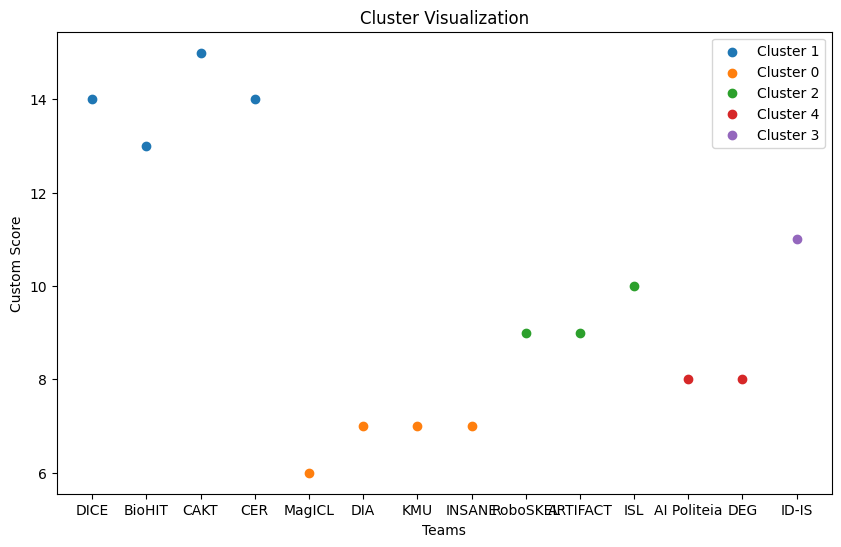

In [321]:
# Display cluster information
for cluster_id, group in clustered_df.groupby('cluster'):
    print(f"Cluster {cluster_id}:")
    print(group[['custom_score']])

# Visualize clusters and factors
plot_clusters(clustered_df)


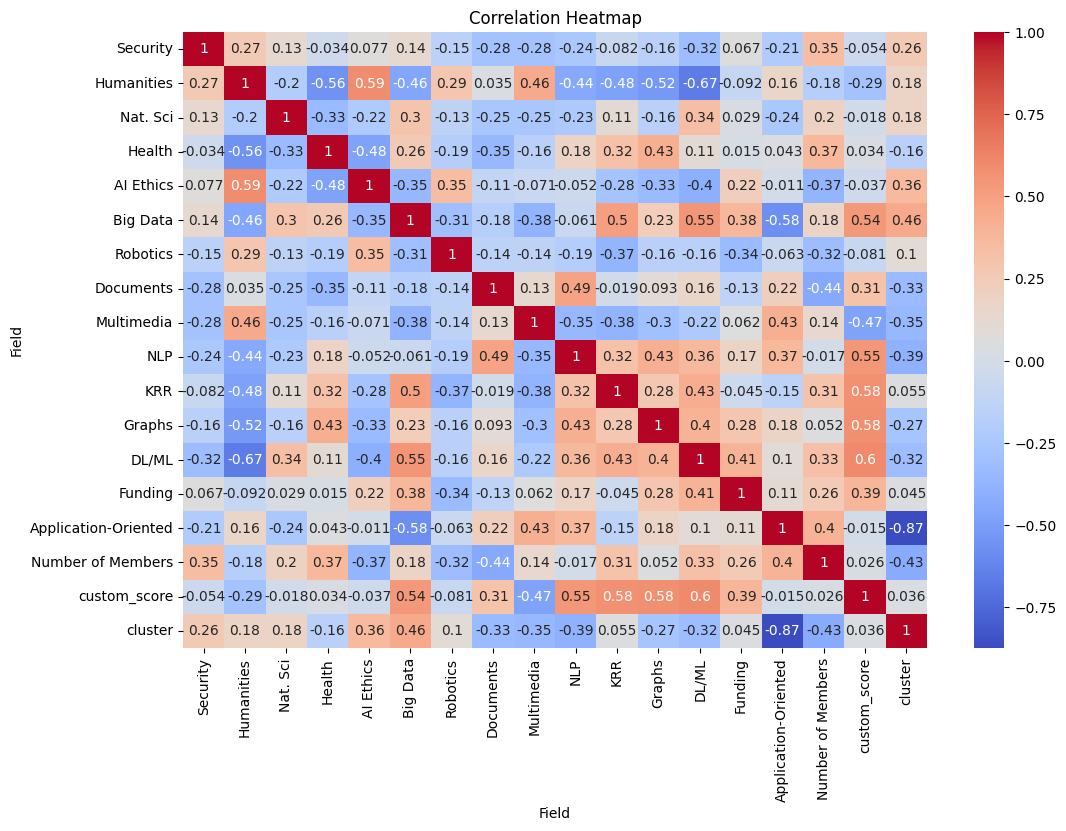

In [297]:
plot_heatmap(clustered_df)

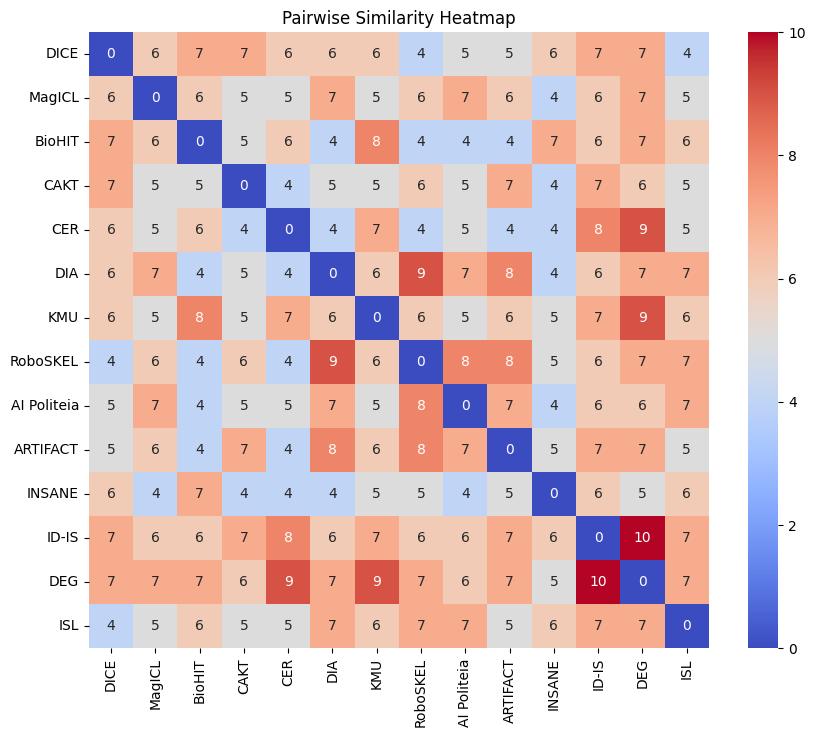

In [307]:
similarity_matrix = calculate_pairwise_similarity(df)
plot_similarity_heatmap(similarity_matrix, df.index)

In [312]:
profile_df = clustered_df
profile_df.head()


Field,Security,Humanities,Nat. Sci,Health,AI Ethics,Big Data,Robotics,Documents,Multimedia,NLP,KRR,Graphs,DL/ML,Funding,Application-Oriented,Number of Members,custom_score,cluster
DICE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,2.0,2.0,1.0,2.0,1,14,1
MagICL,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,3.0,3.0,3,6,0
BioHIT,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0,3.0,3.0,2,13,1
CAKT,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,3.0,3.0,3.0,2,15,1
CER,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,2.0,2.0,3,14,1


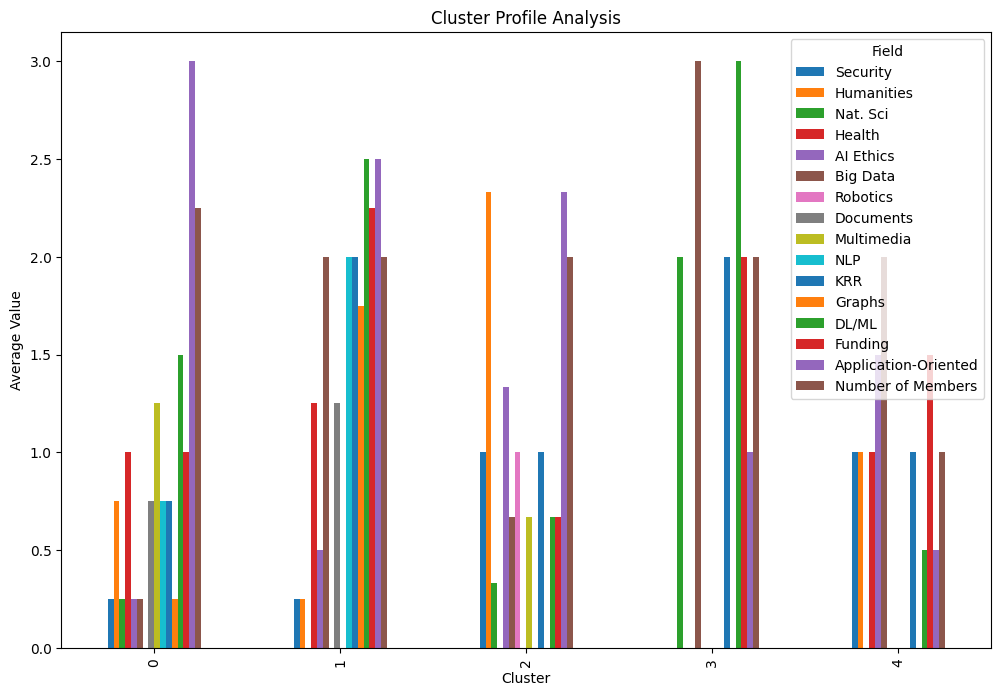

In [313]:

profile_df.drop(['custom_score'], axis=1, inplace=True)
plot_cluster_profiles(profile_df)

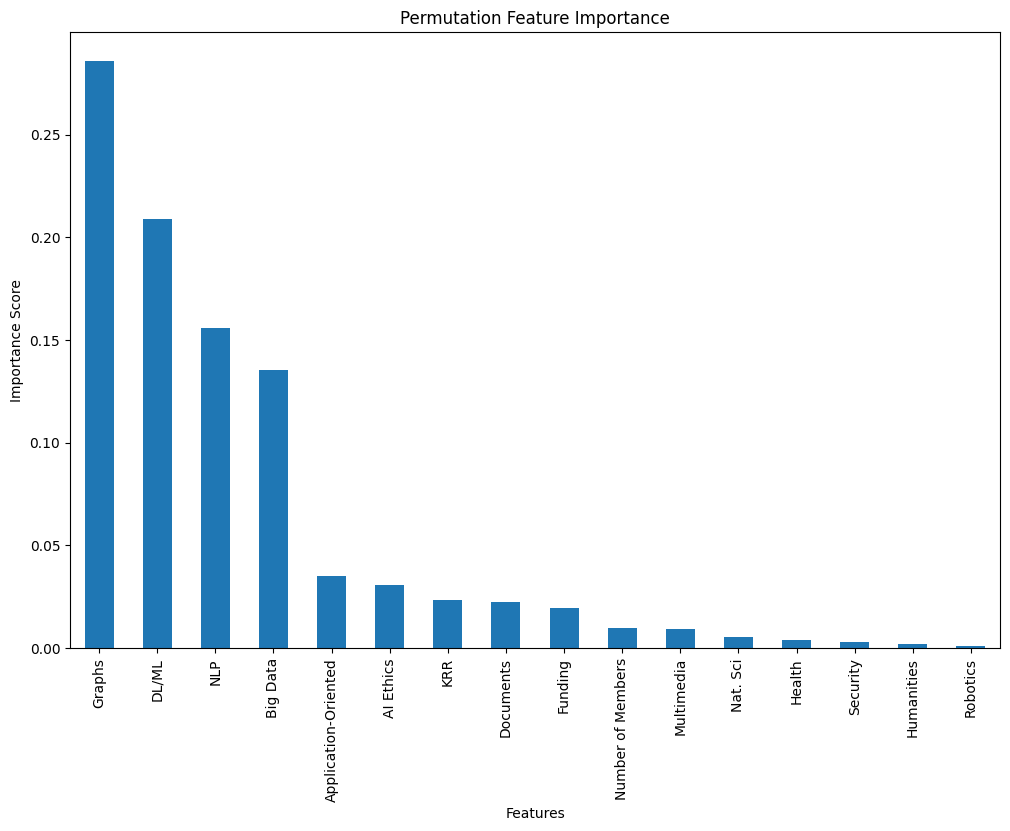

In [324]:
#Feature Importance Analysis

#Importance Scores
    #Analyze which features are most important for determining custom scores
#Bar plot to visualize the importance of each feature

#Permutation Importance
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor


# Calculate permutation feature importance
def calculate_permutation_feature_importance(df):
    feature_columns = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 
                       'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML', 
                       'Funding', 'Application-Oriented', 'Number of Members']
    X = df[feature_columns]
    y = df['custom_score']
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    permutation_importances = pd.Series(result.importances_mean, index=feature_columns)
    return permutation_importances


def plot_permutation_feature_importance(permutation_importances):
    permutation_importances = permutation_importances.sort_values(ascending=False)
    plt.figure(figsize=(12, 8))
    permutation_importances.plot(kind='bar')
    plt.title('Permutation Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.show()
    
permutation_feature_importances = calculate_permutation_feature_importance(df)
plot_permutation_feature_importance(permutation_feature_importances)





In [329]:
  pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


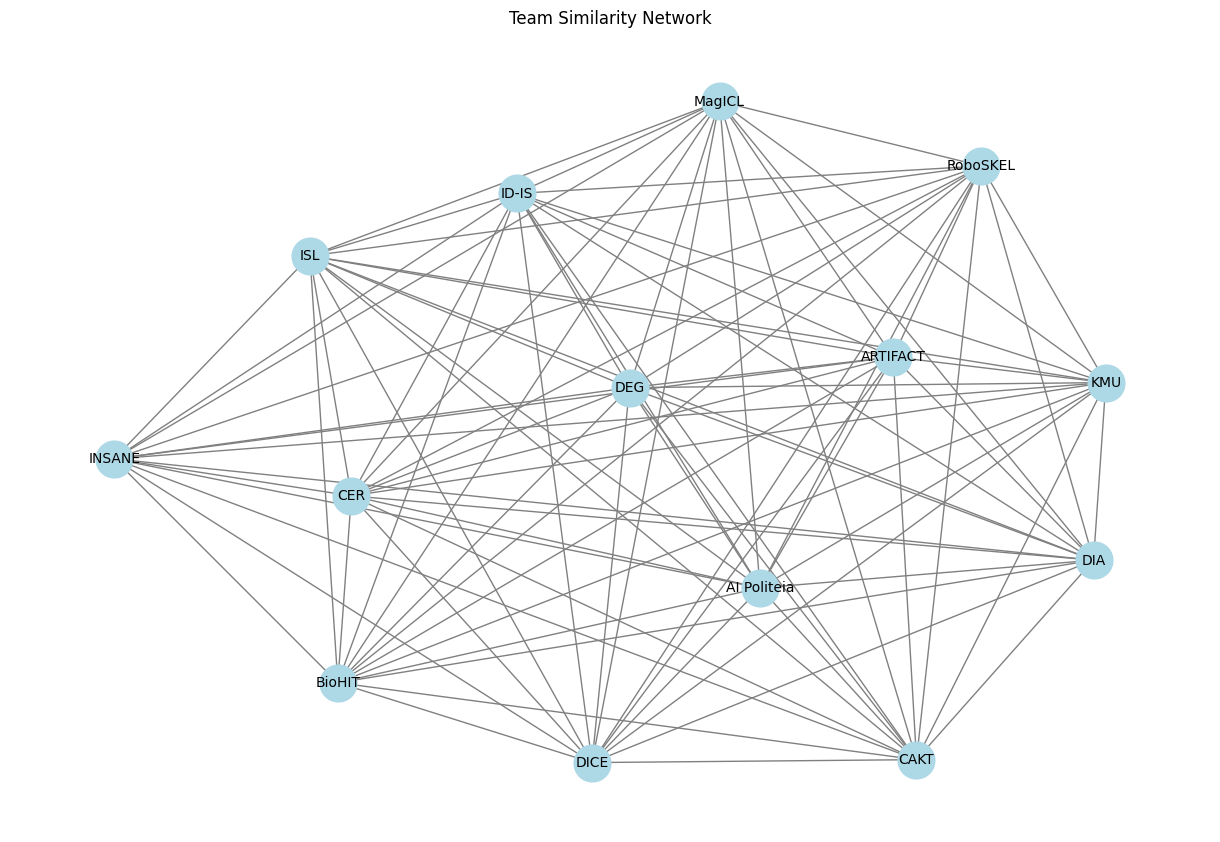

In [330]:
#Network Analysis
    #Nodes---> Team
    #Edges--->Similarities/Potential merges

import networkx as nx

import matplotlib.pyplot as plt

# Create a team similarity network
def plot_team_network(df, similarity_matrix):
    G = nx.Graph()
    
    # Add nodes
    for team in df.index:
        G.add_node(team)
    
    # Add edges
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            if similarity_matrix[i, j] > 0:  # Only add edges with positive similarity
                G.add_edge(df.index[i], df.index[j], weight=similarity_matrix[i, j])
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, edge_color='gray')
    plt.title('Team Similarity Network')
    plt.show()

# Main execution for network analysis
plot_team_network(df, similarity_matrix)
